#### Imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pprint
%matplotlib inline
from datetime import datetime, timedelta

The Original Dataset

In [6]:
data = pd.read_excel("DatasetBDOS.xlsx", header=3)

In [7]:
data.head()

,Country,Year,Month,Day,Coverage ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,AT,2006,1,1,100.0,6297.0,6005.0,5743.0,5397.0,5213.0,5190.0,4916.0,5158.0,5405.0,5731.0,6075.0,6385.0,6276.0,6249.0,6247.0,6231.0,6603.0,6979.0,7022.0,6930.0,6560.0,6170.0,6501.0,6168.0
1,AT,2006,1,2,100.0,5900.0,5643.0,5524.0,5372.0,5481.0,5941.0,6459.0,7352.0,7840.0,8107.0,8250.0,8434.0,8312.0,8259.0,8190.0,8168.0,8469.0,8735.0,8617.0,8218.0,7773.0,7247.0,7413.0,6926.0
2,AT,2006,1,3,100.0,6483.0,6192.0,5991.0,5773.0,5849.0,6252.0,6685.0,7480.0,7872.0,8154.0,8292.0,8435.0,8222.0,8150.0,8112.0,8055.0,8342.0,8670.0,8534.0,8203.0,7745.0,7214.0,7397.0,6981.0
3,AT,2006,1,4,100.0,6522.0,6217.0,6027.0,5802.0,5866.0,6289.0,6730.0,7554.0,7947.0,8180.0,8309.0,8241.0,8253.0,8233.0,8145.0,8081.0,8331.0,8470.0,8460.0,8185.0,7759.0,7242.0,7441.0,6981.0
4,AT,2006,1,5,100.0,6575.0,6237.0,6065.0,5841.0,5887.0,6283.0,6704.0,7491.0,7964.0,8202.0,8337.0,8434.0,8240.0,8153.0,8046.0,8042.0,8268.0,8361.0,8453.0,8114.0,7606.0,7139.0,7333.0,6888.0


Filtering Italy Data

In [280]:
dataset = data[data["Country"]=="IT"].reset_index(drop=True)

In [281]:
#coverage ratio not needed
dataset = dataset.drop(labels="Coverage ratio",axis=1)

In [282]:
dataset.head()

,Country,Year,Month,Day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,IT,2006,1,1,27190.0,25782.0,24354.0,23340.0,22786.0,22965.0,23605.0,23880.0,24933.0,26918.0,28748.0,29965.0,29118.0,27513.0,27395.0,27776.0,30763.0,32602.0,33478.0,33536.0,32778.0,31285.0,29275.0,26557.0
1,IT,2006,1,2,24488.0,23050.0,22558.0,22446.0,23259.0,25859.0,30566.0,35043.0,39427.0,41456.0,41975.0,41677.0,39823.0,39785.0,40513.0,41171.0,45000.0,46014.0,45535.0,42869.0,40550.0,37386.0,34061.0,30892.0
2,IT,2006,1,3,28459.0,27217.0,26527.0,26511.0,27125.0,29452.0,34095.0,38914.0,43151.0,44855.0,44732.0,43710.0,41293.0,41441.0,42231.0,42719.0,46119.0,47777.0,46844.0,44512.0,41821.0,38331.0,35128.0,31741.0
3,IT,2006,1,4,29211.0,27713.0,27128.0,27017.0,27557.0,29745.0,34875.0,39798.0,43695.0,45081.0,44932.0,44302.0,41822.0,41633.0,42253.0,43215.0,46366.0,48330.0,47429.0,45069.0,42397.0,39010.0,35760.0,32367.0
4,IT,2006,1,5,29763.0,28210.0,27609.0,27296.0,27888.0,30012.0,34791.0,40252.0,44138.0,45659.0,45260.0,44325.0,41964.0,41807.0,42617.0,43208.0,46196.0,47626.0,46989.0,44375.0,41683.0,38441.0,35304.0,32147.0


Transforming Dataset into useful format and saving it

In [283]:
dataset = dataset.melt(id_vars=['Country','Year','Month','Day'], var_name='Hour', value_name='EC_MW')

In [284]:
dataset = dataset.sort_values(['Year','Month','Day'])
dataset = dataset.reset_index(drop=True)
dataset.head()

,Country,Year,Month,Day,Hour,EC_MW
0,IT,2006,1,1,0,27190.0
1,IT,2006,1,1,1,25782.0
2,IT,2006,1,1,2,24354.0
3,IT,2006,1,1,3,23340.0
4,IT,2006,1,1,4,22786.0


In [286]:
dataset['datetime'] = pd.to_datetime(dataset[['Year', 'Month', 'Day','Hour']], format = '%Y/%M/%D %H')

In [287]:
dataset = dataset.drop(labels=['Country','Year','Month','Day','Hour'],axis=1)

In [288]:
cols = ['datetime','EC_MW']
dataset = dataset[cols]
dataset.head()

,datetime,EC_MW
0,2006-01-01 00:00:00,27190.0
1,2006-01-01 01:00:00,25782.0
2,2006-01-01 02:00:00,24354.0
3,2006-01-01 03:00:00,23340.0
4,2006-01-01 04:00:00,22786.0


In [124]:
#Save point
dataset.to_csv("dataset.csv",index=None)

Removing Null values


In [10]:
df = pd.read_csv('dataset.csv')

In [11]:
df.head()

,datetime,EC_MW
0,2006-01-01 00:00:00,27190.0
1,2006-01-01 01:00:00,25782.0
2,2006-01-01 02:00:00,24354.0
3,2006-01-01 03:00:00,23340.0
4,2006-01-01 04:00:00,22786.0


In [12]:
df.isnull().sum()

datetime     0
EC_MW       10
dtype: int64

In [13]:
df = df.interpolate()

In [14]:
df.isnull().sum()

datetime    0
EC_MW       0
dtype: int64

#### Exploratory Data Analysis

In [15]:
df.head()

,datetime,EC_MW
0,2006-01-01 00:00:00,27190.0
1,2006-01-01 01:00:00,25782.0
2,2006-01-01 02:00:00,24354.0
3,2006-01-01 03:00:00,23340.0
4,2006-01-01 04:00:00,22786.0


In [16]:
dataset = df
dataset["Month"] = pd.to_datetime(df["datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["datetime"]).dt.day_name()
dataset['Q'] = pd.to_datetime(df['datetime']).dt.quarter
#dataset = df.set_index("datetime")
#dataset.index = pd.to_datetime(dataset.index)
dataset = dataset.set_index("datetime")
dataset.head(1)


,EC_MW,Month,Year,Date,Time,Week,Day,Q
datetime,,,,,,,,
2006-01-01 00:00:00,27190.0,1,2006,2006-01-01,00:00:00,52,Sunday,1


In [17]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015] 

Total Number of Unique Year 10 



In [18]:
lab=['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM',
            '10AM','11AM','12PM', '1PM','2PM','3PM','4PM','5PM','6PM','7PM',
            '8PM','9PM','10PM',"11PM"]

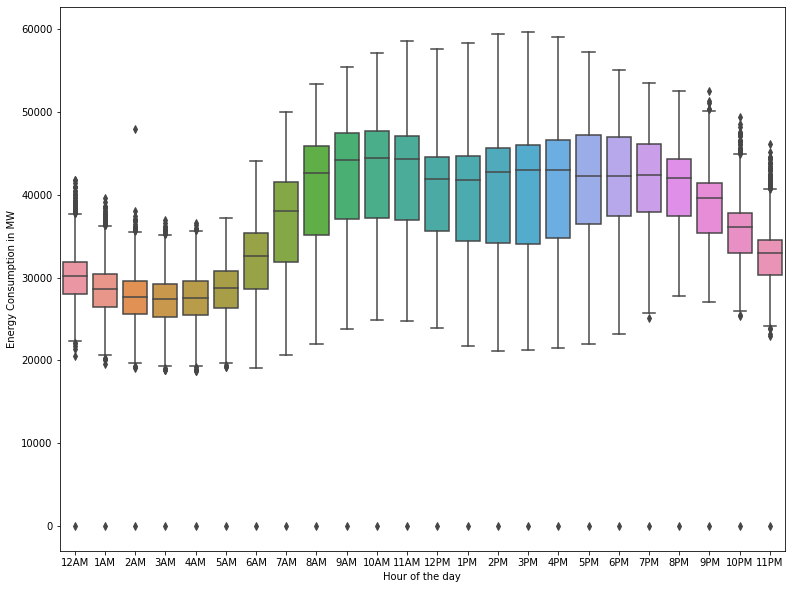

In [22]:
fig, ax = plt.subplots(figsize=(13, 10)) 
dayplot = sns.boxplot(x=df['Time'], y=df.EC_MW)
dayplot.set(ylabel='Energy Consumption in MW',xlabel='Hour of the day')
labs = dayplot.set_xticklabels(lab)

[Text(0, 0.5, 'Energy Consumption in MW'), Text(0.5, 0, 'Day of the Week')]

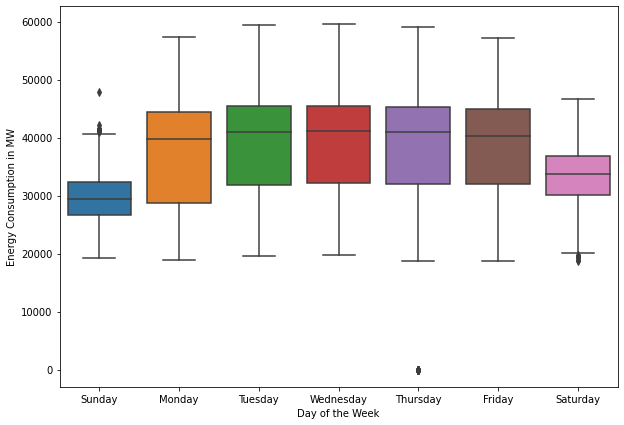

In [24]:
fig, ax = plt.subplots(figsize=(10, 7)) 
weekplot = sns.boxplot(x=df['Day'], y=df.EC_MW)
weekplot.set(ylabel='Energy Consumption in MW',xlabel='Day of the Week')


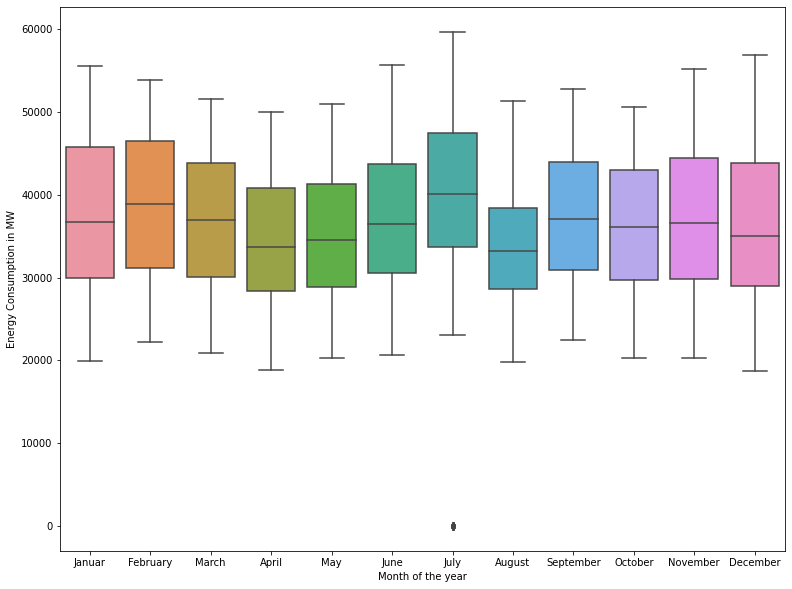

In [25]:
l = ['Januar','February','March','April','May','June','July','August','September','October','November','December']
fig, ax = plt.subplots(figsize=(13, 10)) 
monthplot = sns.boxplot(x=df['Month'], y=df.EC_MW)
monthplot.set(ylabel='Energy Consumption in MW',xlabel='Month of the year')
lab = monthplot.set_xticklabels(l)

Text(0, 0.5, 'Energy in MW')

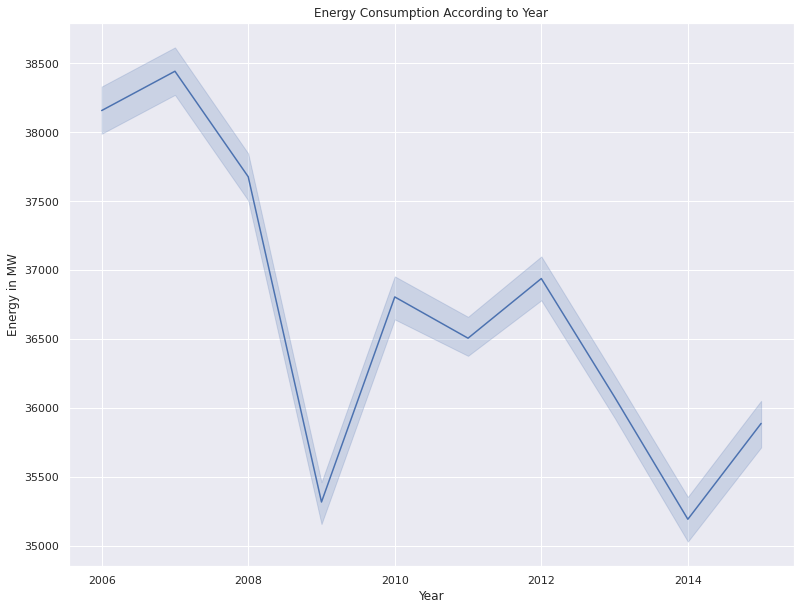

In [206]:
from matplotlib import style

fig, ax1 = plt.subplots(figsize=(13, 10)) 


yearplot = sns.lineplot(x=dataset["Year"], y=dataset["EC_MW"], data=df)

plt.title("Energy Consumption According to Year")
plt.xlabel("Year")
plt.ylabel("Energy in MW")


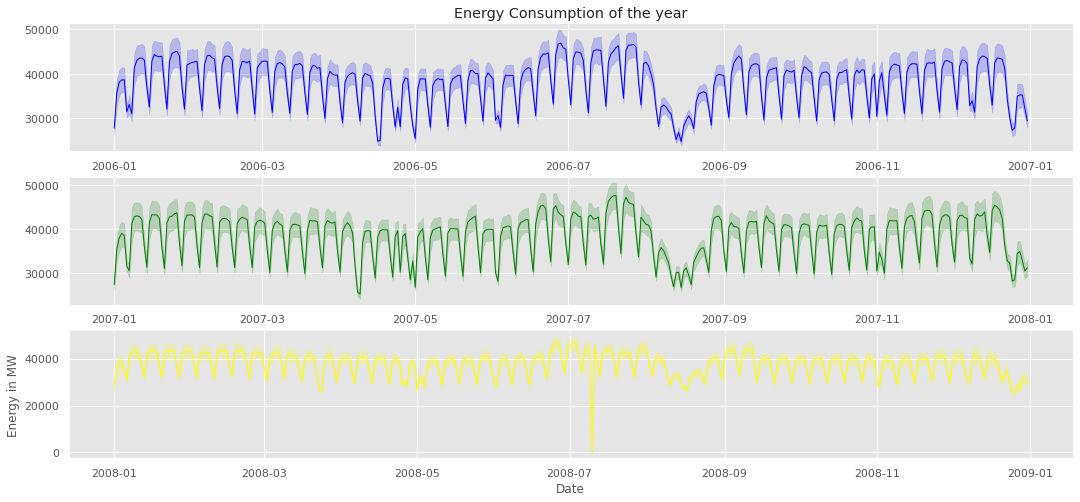

In [230]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2006 = dataset[dataset['Year']==2006]["EC_MW"].to_list()
x_2006 = dataset[dataset['Year']==2006]["Date"].to_list()
plot2006 = sns.lineplot(x=x_2006,y=y_2006, color="blue", linewidth=1,ax=ax1,legend=2006)


y_2007 = dataset[dataset['Year']==2007]["EC_MW"].to_list()
x_2007 = dataset[dataset['Year']==2007]["Date"].to_list()
plot2007=sns.lineplot(x=x_2007, y=y_2007, color="green", linewidth=1,ax=ax2,legend=2007)


y_2008 = dataset[dataset['Year']==2008]["EC_MW"].to_list()
x_2008 = dataset[dataset['Year']==2008]["Date"].to_list()
plot2008=sns.lineplot(x= x_2008,y=y_2008, color="yellow", linewidth=1,ax=ax3,legend=2008)

plt.rcParams["figure.figsize"] = (18,8)
d=plot2006.set_title( "Energy Consumption of the year")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ennergy Distribution')

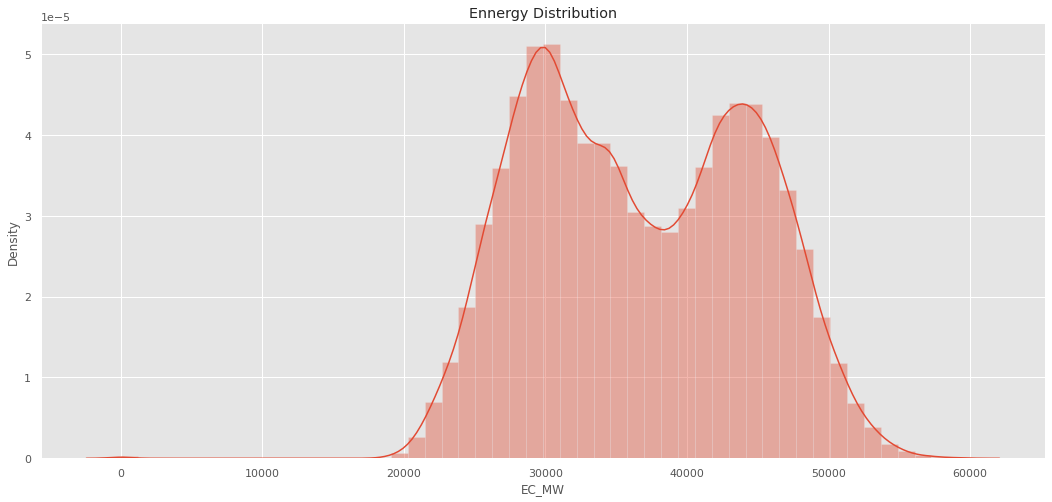

In [243]:
distribution =sns.distplot(dataset["EC_MW"])
distribution =plt.title("Energy Distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

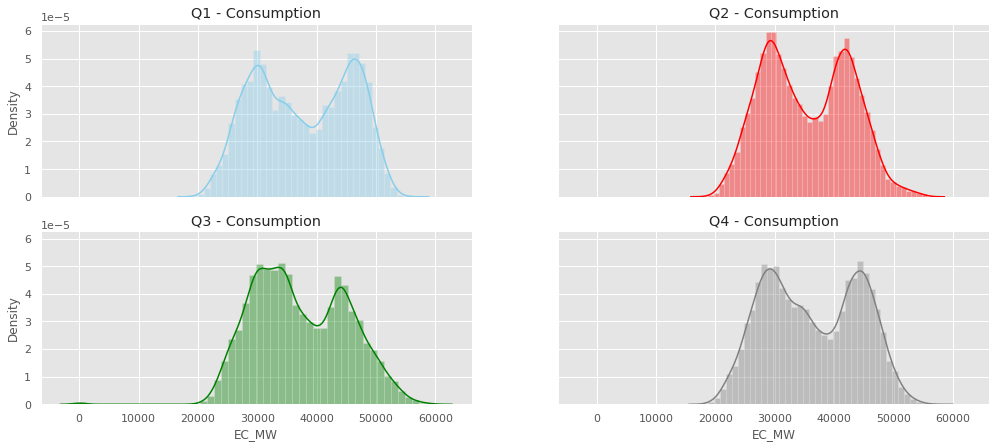

In [263]:
#Data prep
Q1 = dataset[dataset["Q"]==1]
Q2 = dataset[dataset["Q"]==2]
Q3 = dataset[dataset["Q"]==3]
Q4 = dataset[dataset["Q"]==4]

#Plot
fig,axes = plt.subplots(2,2,figsize=(17,7),sharex=True,sharey=True)

sns.distplot(Q1["EC_MW"],color="skyblue", ax=axes[0,0]).set_title("Q1 - Consumption")
sns.distplot(Q2["EC_MW"],color="red", ax=axes[0,1]).set_title("Q2 - Consumption")
sns.distplot(Q3["EC_MW"],color="green", ax=axes[1,0]).set_title("Q3 - Consumption")
sns.distplot(Q4["EC_MW"],color="gray", ax=axes[1,1]).set_title("Q4 - Consumption")

del Q1, Q2, Q3, Q4

In [27]:
df = pd.read_csv('dataset.csv',index_col='datetime')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87648 entries, 2006-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EC_MW   87638 non-null  float64
dtypes: float64(1)
memory usage: 1.3+ MB


In [29]:
df.isnull().sum()

EC_MW    10
dtype: int64

In [30]:
df1= df.interpolate()

In [31]:
df1.isnull().sum()

EC_MW    0
dtype: int64

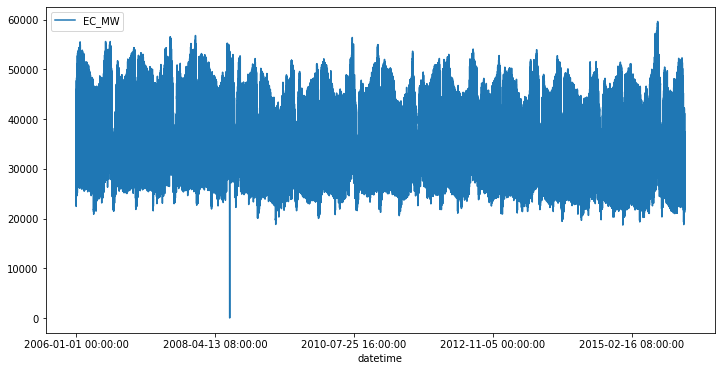

In [53]:
df1.plot(figsize=(12,6))

#### Univariate Model (LSTM)

#### Feature Engineering

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
df1['datetime'] = pd.to_datetime(df1['datetime'])

In [62]:
df1 = df1.set_index('datetime')

In [63]:
results  = seasonal_decompose(df1['EC_MW'])

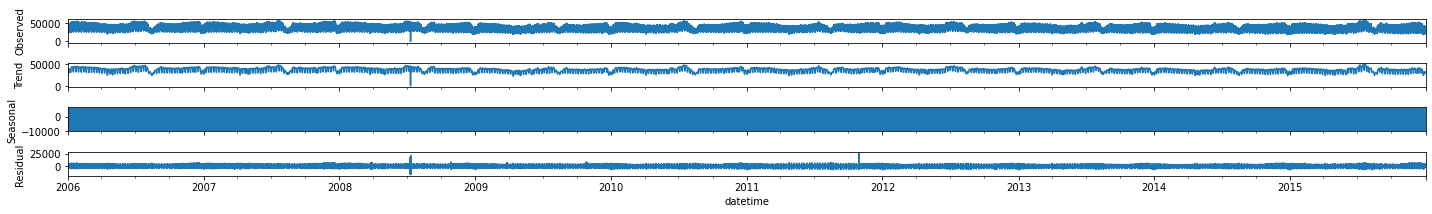

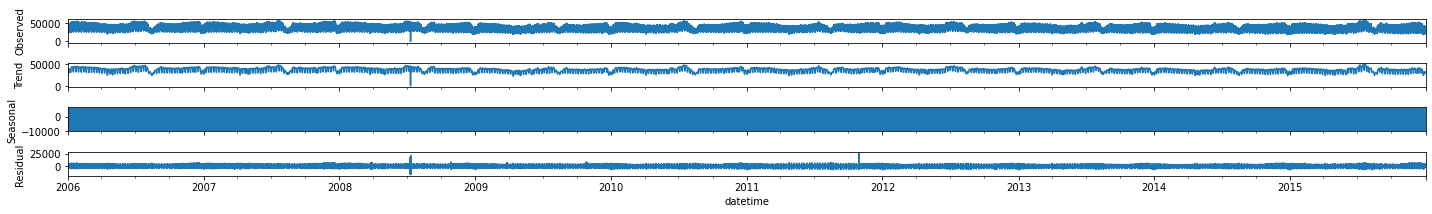

In [64]:
results.plot()

Test, Train, validation split

In [65]:
len(df1)

87648

In [66]:
train = df1.iloc[:61368]
val = df1.iloc[61368:70128]
test = df1.iloc[70128:]

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator

In [69]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_val = scaler.transform(val)
scaled_test = scaler.transform(test)

In [70]:
scaled_train[:10]

array([[0.47851184],
       [0.45373271],
       [0.4286016 ],
       [0.4107564 ],
       [0.40100665],
       [0.40415684],
       [0.41542008],
       [0.42025976],
       [0.43879131],
       [0.47372497]])

In [71]:
scaled_test[:10]

array([[0.44394777],
       [0.42585618],
       [0.40118264],
       [0.37856816],
       [0.36565063],
       [0.3645595 ],
       [0.37710746],
       [0.38228151],
       [0.38717398],
       [0.41776073]])

In [72]:
scaled_val[:10]

array([[0.47735032],
       [0.45755165],
       [0.43235015],
       [0.41124916],
       [0.39500546],
       [0.39349196],
       [0.40436803],
       [0.40730703],
       [0.40908451],
       [0.4345852 ]])

In [75]:
#we predict by looking at the 24 hours of previous day data
nhours = 24
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length= nhours, batch_size=1)

In [76]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape= (nhours,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=50)

Epoch 1/50
 8328/61344 [===>..........................] - ETA: 23:31 - loss: 0.0162